In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv('movies_success.csv', sep=',')

In [4]:
average_profit = data[data['made_profit']==True]
average_noprofit = data[data['made_profit']==False]

### Histograms

(array([111.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 625.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

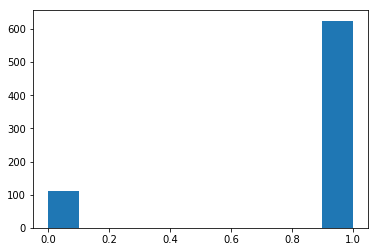

In [5]:
plt.hist(data['made_profit'])

(array([ 1.,  0.,  1.,  3., 11., 34., 25., 23.,  9.,  4.]),
 array([1.5 , 1.78, 2.06, 2.34, 2.62, 2.9 , 3.18, 3.46, 3.74, 4.02, 4.3 ]),
 <a list of 10 Patch objects>)

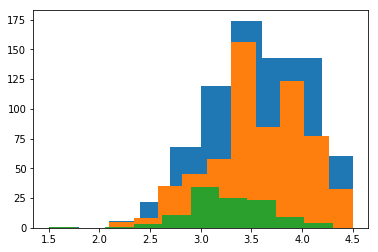

In [6]:
plt.hist(data['audience_average'])
plt.hist(average_profit['audience_average'])
plt.hist(average_noprofit['audience_average'])

(array([ 1.,  2.,  5.,  8., 21., 25., 17., 19.,  9.,  4.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

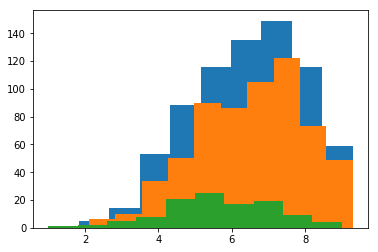

In [7]:
plt.hist(data['critic_average'])
plt.hist(average_profit['critic_average'])
plt.hist(average_noprofit['critic_average'])

In [ ]:
#plt.hist(data['genre'])

### Statistical Tests

In [ ]:
norm1 = stats.normaltest(data['critic_average']).pvalue
norm2 = stats.normaltest(data['audience_average']).pvalue
print("Normality Tests\nCritic Average pvalue: %0.03g  Audience Average pvalue: %0.03g" % (norm1,norm2))

In [ ]:
#transforming critic_average data by squaring makes it look normal, still fails normality test
#probably because the number of data points > 40
plt.hist(data['critic_average']**2)


#transforming audience_average data by squaring makes it look normal, still fails normality test
#plt.hist(data['audience_average']**2)

In [ ]:
#Levene Test

levene1 = stats.levene(average_profit['audience_average'],average_noprofit['audience_average']).pvalue
levene2 = stats.levene(average_profit['critic_average'],average_noprofit['critic_average']).pvalue

print("Variance between profit and profit\nAudience: %0.03g, Critic: %0.03g" % (levene1,levene2))
#Can conclude that both groups have equal variance

In [ ]:
#T-test
#Are the means different for audience and critic reviews between movies that made profit and no profit?
#Yes as it turns out (p << 0.05)

stats.ttest_ind(average_profit['audience_average'],average_noprofit['audience_average']).pvalue
#stats.ttest_ind(average_profit['critic_average'],average_noprofit['critic_average']).pvalue
#stats.ttest_ind(average_profit['audience_average'],average_profit['critic_average']).pvalue
#stats.ttest_ind(average_noprofit['audience_average'],average_profit['critic_average']).pvalue

In [ ]:
stats.mannwhitneyu(average_profit['audience_average'],average_noprofit['audience_average']).pvalue

In [ ]:
#data.groupby(['genre']).agg(['mean','count'])
#average_profit.groupby(['genre']).agg(['mean','count'])


In [ ]:
genre_success = data[['genre','made_profit','audience_average','critic_average']]
x = genre_success.groupby(['genre','made_profit']).agg({'genre':'count','audience_average':'mean','critic_average':'mean'}).rename(columns={'genre': 'count'})
x = x[x['count']>1]
x = x.reset_index(level=['genre','made_profit'])
x

In [ ]:
x['profit'] = x[x['made_profit']==True]['count']
x['no_profit']= x[x['made_profit']==False]['count']
p = x[x['made_profit']==True]
p = p.drop(columns=['no_profit','made_profit','count'])
np = x[x['made_profit']==False]
np = np.drop(columns=['profit','made_profit','count'])
#suffixes indicate p = profit, np = no_profit to distinguish between averages
merge = p.merge(np,how='left',on='genre', suffixes=('_p','_np')).fillna(0)
merge

### Chi-Squared Test

In [ ]:
genre_contingency = list(merge[['profit', 'no_profit']].itertuples(index=False, name=None))
genre_critic_contingency = list(merge[['profit', 'no_profit','audience_average_p','critic_average_p','audience_average_np','critic_average_np']].itertuples(index=False, name=None))


In [ ]:
#contingency table
#Note: Only counting genres with more than 1 movie with profit/no_profit
#        Profit  No_Profit
#Genre1  count
#Genre2

chi2, genre_contingency_pval, dof, expected = stats.chi2_contingency(genre_contingency)

genre_contingency_pval

In [ ]:
#contingency table
#Note: Only counting genres with more than 1 movie with profit/no_profit
#        Audience_Average_Profit | Critic_Average_Profit | Profit | Audience_Average_Profit| Critic_Average_Profit| No_Profit
#Genre1  count                              count        ...
#Genre2    .
#....
#GenreN

chi2, genre_critic_contingency_pval, dof, expected = stats.chi2_contingency(genre_critic_contingency)

genre_critic_contingency_pval

In [10]:
a

NameError: name 'a' is not defined